In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('dl_data_exp1').sheet1


rows = worksheet.get_all_values()


df = pd.DataFrame(rows[1:], columns=rows[0])
df.head()

,Input,Output
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


In [ ]:
df['Input']=pd.to_numeric(df['Input'])
df['Output']=pd.to_numeric(df['Output'])

In [ ]:
X = df[['Input']].values
y = df[['Output']].values

In [ ]:
X

,Input
0,0
1,1
2,2
3,3
4,4
...,...
80,80
81,81
82,82
83,83


In [ ]:
y

,Output
0,0
1,1
2,4
3,9
4,16
...,...
80,6400
81,6561
82,6724
83,6889


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()
Scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train.shape

(56, 1)

In [ ]:
x_train1 = Scaler.transform(x_train)
x_train1.shape

(56, 1)

In [ ]:
model = Sequential([
    Dense(units = 5,activation = 'relu',input_shape=[1]),
    Dense(units = 2, activation = 'relu'),
    Dense(units = 1)
])

In [ ]:
model.compile(optimizer='rmsprop', loss = 'mae')

In [ ]:
model.fit(x_train1,y_train,epochs = 2000)

Epoch 1/2000
2/2 [==============================] - 1s 11ms/step - loss: 2123.4189
Epoch 2/2000
2/2 [==============================] - 0s 8ms/step - loss: 2122.7310
Epoch 3/2000
2/2 [==============================] - 0s 8ms/step - loss: 2122.2446
Epoch 4/2000
2/2 [==============================] - 0s 8ms/step - loss: 2121.8340
Epoch 5/2000
2/2 [==============================] - 0s 8ms/step - loss: 2121.4700
Epoch 6/2000
2/2 [==============================] - 0s 8ms/step - loss: 2121.1318
Epoch 7/2000
2/2 [==============================] - 0s 7ms/step - loss: 2120.8040
Epoch 8/2000
2/2 [==============================] - 0s 7ms/step - loss: 2120.4895
Epoch 9/2000
2/2 [==============================] - 0s 6ms/step - loss: 2120.1799
Epoch 10/2000
2/2 [==============================] - 0s 6ms/step - loss: 2119.8848
Epoch 11/2000
2/2 [==============================] - 0s 6ms/step - loss: 2119.6030
Epoch 12/2000
2/2 [==============================] - 0s 5ms/step - loss: 2119.3215
Epoch 13/200

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

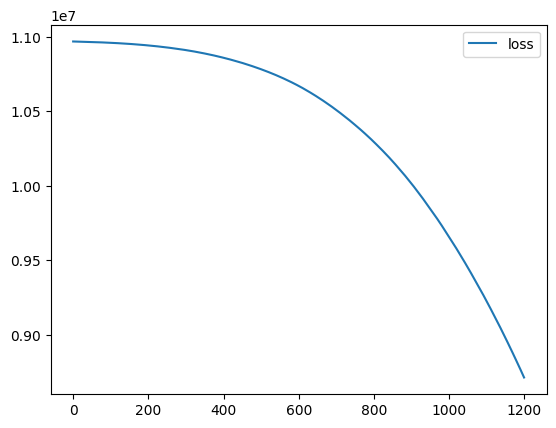

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
x_test1 = Scaler.transform(x_test)
model.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 486ms/step - loss: 6712172.0000


6712172.0

In [ ]:
x_n = [[21]]
x_n1 = Scaler.transform(x_n)
model.predict(x_n1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 317ms/step


array([[225.19034]], dtype=float32)